# Preliminary Data exploration

In this notebook I remove and add columns in order to prepare the data for the general linear model.

Import dataset with all metadata and preprocessing.

In [1]:
import pandas as pd

df = pd.read_csv("../Materials/Merged_Dataset.csv")
df.head()

,Unnamed: 0,Image,Collection,Production,Date,Occasion,Multiple bill,Performances_ID,Normalised title,Original language,Composer,Original premiere,Original title,genre,Season,Directors,Title_Language,Leaflet_Language,Opmerking
0,0,K.V.O. programmas 1893-97_00005-20211201_11335...,1893-1897,De Vrijschutter,1893-10-03,Eerste vertoning,False,903641,De Vrijschutter,DUI,Carl Maria von Weber,1821,Der Freischütz,romantische oper,1893-1894,Edward Keurvels & Henry Fontaine,NL,NaN,NaN
1,1,K.V.O. programmas 1893-97_00009-20211201_11343...,1893-1897,Willem Tell,1893-10-05,Eerste vertoning,False,316913,Willem Tell,DUI,Carl Reinecke,1971,Musik zu Schiller’s 'Wilhelm Tell,romantische oper,1893-1894,Edward Keurvels & Henry Fontaine,Unk,NaN,NaN
2,2,K.V.O. programmas 1893-97_00011-20211201_11345...,1893-1897,De Vrijschutter,1893-10-10,NaN,False,135474,De Vrijschutter,DUI,Carl Maria von Weber,1821,Der Freischütz,romantische oper,1893-1894,Edward Keurvels & Henry Fontaine,NL,NaN,NaN
3,3,K.V.O. programmas 1893-97_00013-20211201_11351...,1893-1897,Willem Tell,1893-10-12,NaN,False,520507,Willem Tell,DUI,Carl Reinecke,1971,Musik zu Schiller’s 'Wilhelm Tell,romantische oper,1893-1894,Edward Keurvels & Henry Fontaine,Unk,NaN,NaN
4,4,K.V.O. programmas 1893-97_00015-20211201_11352...,1893-1897,Charlotte Corday,1893-11-16,NaN,False,446314,Charlotte Corday,NL,Peter Benoit,?,Charlotte Corday,lyrisch drama,1893-1894,Edward Keurvels & Henry Fontaine,Unk,NaN,NaN


In [2]:
#remove trailing and leading whitespaces.
for column in df.columns:
    try:
        df[column] = df[column].str.strip()
    except AttributeError:
        continue

In [3]:
#Only keep the relevant columns
df = df[['Date', 'Original premiere', 'Directors' ,'Normalised title', 'Composer', 'Occasion', 'Original language', 'Multiple bill', "Season", 'Title_Language']]
df.sample(5)

,Date,Original premiere,Directors,Normalised title,Composer,Occasion,Original language,Multiple bill,Season,Title_Language
6513,1945-07-22,1881,August L. Baeyens,Hoffman’s Vertellingen,Jacques Offenbach,NaN,FR,False,1944-1945,NL
717,1904-02-06,1868,Jef Judels & Bernard Tokkie,De Meesterzangers van Nurenberg,Richard Wagner,NaN,DUI,False,1903-1904,NL
3984,1931-12-03,1860,Fé Derickx & Bernard Tokkie,Tristan en Isolde,Richard Wagner,gala,DUI,False,1931-1932,NL
4448,1934-10-11,1877,Flor Bosmans,Samson en Dalila,Camille Saint-Saëns,NaN,FR,False,1934-1935,NL
5676,1941-10-23,1875,Jef Sterkens,Carmen,Georges Bizet,NaN,FR,False,1941-1942,Unk


### Occasions

In [4]:
#Create a new column in which we keep track of: 
#   the Gala performances (G)
#   the popular peformances (P)
#   all others (N)

df['Occasion'] = df['Occasion'].str.lower()
df['OCC'] = df['Occasion'].astype(str).apply(lambda x: 'G' if 'gala' in x else 'P' if 'volk' in x.lower() else 'N')
df['OCC'].value_counts()

N    6126
G     600
P      41
Name: OCC, dtype: int64

In [5]:
df.head()

,Date,Original premiere,Directors,Normalised title,Composer,Occasion,Original language,Multiple bill,Season,Title_Language,OCC
0,1893-10-03,1821,Edward Keurvels & Henry Fontaine,De Vrijschutter,Carl Maria von Weber,eerste vertoning,DUI,False,1893-1894,NL,N
1,1893-10-05,1971,Edward Keurvels & Henry Fontaine,Willem Tell,Carl Reinecke,eerste vertoning,DUI,False,1893-1894,Unk,N
2,1893-10-10,1821,Edward Keurvels & Henry Fontaine,De Vrijschutter,Carl Maria von Weber,NaN,DUI,False,1893-1894,NL,N
3,1893-10-12,1971,Edward Keurvels & Henry Fontaine,Willem Tell,Carl Reinecke,NaN,DUI,False,1893-1894,Unk,N
4,1893-11-16,?,Edward Keurvels & Henry Fontaine,Charlotte Corday,Peter Benoit,NaN,NL,False,1893-1894,Unk,N


### Original language of the work (Production_Language

In [6]:
# Create column to keep track of German and Dutch language
df['Production_Language'] = df['Original language'].str.lower()
df['Production_Language'] = df['Original language'].astype(str).apply(lambda x: 'German' if 'DUI' in x else 'Dutch' if 'NL' in x else 'other')
df['Production_Language'].value_counts()

German    2874
other     2794
Dutch     1099
Name: Production_Language, dtype: int64

In [7]:
df.head()

,Date,Original premiere,Directors,Normalised title,Composer,Occasion,Original language,Multiple bill,Season,Title_Language,OCC,Production_Language
0,1893-10-03,1821,Edward Keurvels & Henry Fontaine,De Vrijschutter,Carl Maria von Weber,eerste vertoning,DUI,False,1893-1894,NL,N,German
1,1893-10-05,1971,Edward Keurvels & Henry Fontaine,Willem Tell,Carl Reinecke,eerste vertoning,DUI,False,1893-1894,Unk,N,German
2,1893-10-10,1821,Edward Keurvels & Henry Fontaine,De Vrijschutter,Carl Maria von Weber,NaN,DUI,False,1893-1894,NL,N,German
3,1893-10-12,1971,Edward Keurvels & Henry Fontaine,Willem Tell,Carl Reinecke,NaN,DUI,False,1893-1894,Unk,N,German
4,1893-11-16,?,Edward Keurvels & Henry Fontaine,Charlotte Corday,Peter Benoit,NaN,NL,False,1893-1894,Unk,N,Dutch


In [8]:
#Create boolean column for original Dutch performances (True) and others (False)
df['Dutch'] = df['Original language'].astype(str).apply(lambda x: 'True' if 'NL' in x else 'False')
df['German'] = df['Original language'].astype(str).apply(lambda x: 'True' if 'DUI' in x else 'False')

print(df['Dutch'].value_counts())
print(df['German'].value_counts())

False    5668
True     1099
Name: Dutch, dtype: int64
False    3893
True     2874
Name: German, dtype: int64


In [9]:
df.head(2)

,Date,Original premiere,Directors,Normalised title,Composer,Occasion,Original language,Multiple bill,Season,Title_Language,OCC,Production_Language,Dutch,German
0,1893-10-03,1821,Edward Keurvels & Henry Fontaine,De Vrijschutter,Carl Maria von Weber,eerste vertoning,DUI,False,1893-1894,NL,N,German,False,True
1,1893-10-05,1971,Edward Keurvels & Henry Fontaine,Willem Tell,Carl Reinecke,eerste vertoning,DUI,False,1893-1894,Unk,N,German,False,True


### Language of the title on the leaflet

In [10]:
# Create column 
df['Title_Language_GLM'] = df['Title_Language'].str.lower()
df['Title_Language_GLM'] = df['Title_Language'].astype(str).apply(lambda x: 'German' if 'DUI' in x else 'Dutch' if 'NL' in x else 'other')
df['Title_Language_GLM'].value_counts()

Dutch     3915
other     2775
German      77
Name: Title_Language_GLM, dtype: int64

In [11]:
df.head(2)

,Date,Original premiere,Directors,Normalised title,Composer,Occasion,Original language,Multiple bill,Season,Title_Language,OCC,Production_Language,Dutch,German,Title_Language_GLM
0,1893-10-03,1821,Edward Keurvels & Henry Fontaine,De Vrijschutter,Carl Maria von Weber,eerste vertoning,DUI,False,1893-1894,NL,N,German,False,True,Dutch
1,1893-10-05,1971,Edward Keurvels & Henry Fontaine,Willem Tell,Carl Reinecke,eerste vertoning,DUI,False,1893-1894,Unk,N,German,False,True,other


In [12]:
#Create boolean column for original Dutch Titles (True) and others (False)
df['Dutch_Title'] = df['Title_Language'].astype(str).apply(lambda x: 'True' if 'NL' in x else 'False')
df['German_Title'] = df['Title_Language'].astype(str).apply(lambda x: 'True' if 'DUI' in x else 'False')
print(df['Dutch_Title'].value_counts())
print(df['German_Title'].value_counts())

True     3915
False    2852
Name: Dutch_Title, dtype: int64
False    6690
True       77
Name: German_Title, dtype: int64


In [13]:
df.head(2)

,Date,Original premiere,Directors,Normalised title,Composer,Occasion,Original language,Multiple bill,Season,Title_Language,OCC,Production_Language,Dutch,German,Title_Language_GLM,Dutch_Title,German_Title
0,1893-10-03,1821,Edward Keurvels & Henry Fontaine,De Vrijschutter,Carl Maria von Weber,eerste vertoning,DUI,False,1893-1894,NL,N,German,False,True,Dutch,True,False
1,1893-10-05,1971,Edward Keurvels & Henry Fontaine,Willem Tell,Carl Reinecke,eerste vertoning,DUI,False,1893-1894,Unk,N,German,False,True,other,False,False


### Drop irrelevant columns, and rename occasion column.

In [14]:
#Drop irrelevant columns, and rename occasion column.
df.drop(['Occasion', 'Original language'], axis='columns', inplace=True)
df.rename(columns={"OCC": "Occasion"}, inplace=True)
df.head()

,Date,Original premiere,Directors,Normalised title,Composer,Multiple bill,Season,Title_Language,Occasion,Production_Language,Dutch,German,Title_Language_GLM,Dutch_Title,German_Title
0,1893-10-03,1821,Edward Keurvels & Henry Fontaine,De Vrijschutter,Carl Maria von Weber,False,1893-1894,NL,N,German,False,True,Dutch,True,False
1,1893-10-05,1971,Edward Keurvels & Henry Fontaine,Willem Tell,Carl Reinecke,False,1893-1894,Unk,N,German,False,True,other,False,False
2,1893-10-10,1821,Edward Keurvels & Henry Fontaine,De Vrijschutter,Carl Maria von Weber,False,1893-1894,NL,N,German,False,True,Dutch,True,False
3,1893-10-12,1971,Edward Keurvels & Henry Fontaine,Willem Tell,Carl Reinecke,False,1893-1894,Unk,N,German,False,True,other,False,False
4,1893-11-16,?,Edward Keurvels & Henry Fontaine,Charlotte Corday,Peter Benoit,False,1893-1894,Unk,N,Dutch,True,False,other,False,False


In [15]:
#df.to_csv('Binomial_prep1893_1946_V2.csv', encoding = 'utf-8-sig')

In [16]:
counts = df.groupby('Season')['Title_Language_GLM'].value_counts().unstack().fillna(0)
#Use grouby, unstack and fillna so that zero is displayed when a language is not featured in a group (season).

# To maintain readability of the table, we only keep the five most common languages
counts = counts[['German', 'Dutch', 'other']]

#We add zero counts for each language during the period when the Opera was closed.
#counts.loc['1914-1915'] = [0, 0, 0, 0]
#counts.loc['1915-1916'] = [0, 0, 0, 0]
#counts.loc['1916-1917'] = [0, 0, 0, 0]
#counts.loc['1917-1918'] = [0, 0, 0, 0]

counts = counts.sort_index()
x = list(counts.index.unique())

# Add zero counts for each language during the period when the Opera was closed.
closed_seasons = ['1914-1915', '1915-1916', '1916-1917', '1917-1918']
closed_data = {col: 0 for col in counts.columns}
closed_df = pd.DataFrame([closed_data], index=closed_seasons)
counts = pd.concat([counts, closed_df])

# Sort the index so that the seasons occur chronologically on the plot.
counts = counts.sort_index()
x = list(counts.index.unique())

In [17]:
import matplotlib.pyplot as plt
import numpy as np

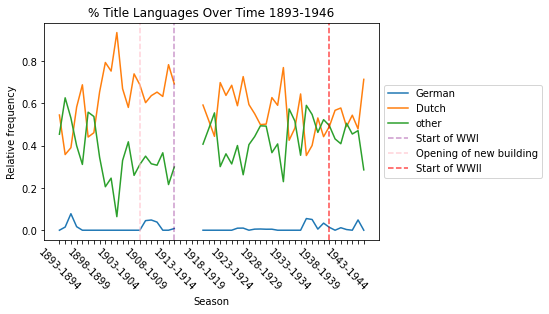

In [18]:
total_counts = counts.sum(axis=1) #we sum across rows to get total of performances per season

# compute the relative frequencies for each language in each season
rel_counts = counts.divide(total_counts, axis=0)

rel_counts.plot(kind='line')

plt.title('% Title Languages Over Time 1893-1946')
plt.xlabel('Season')
plt.ylabel('Relative frequency')

plt.axvline(x= 20, color='purple', alpha=0.4, linestyle='--', label='Start of WWI')
plt.axvline(x=14, color='pink', alpha=0.7, linestyle='--', label='Opening of new building')
plt.axvline(x=counts.index.get_loc('1940-1941'), color='red', alpha=0.7, linestyle='--', label='Start of WWII')

plt.legend(loc = 0)
x = list(counts.index)
x_ticks = [x[i] if i % 5 == 0 else '' for i in range(len(x))]  # Show every 5 years
plt.xticks(np.arange(len(x)), x_ticks, rotation=-45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

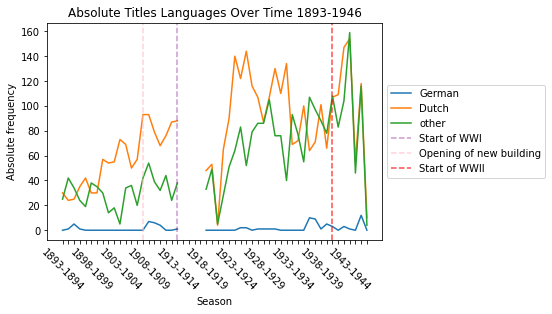

In [19]:
# Convert 0 to NaN counts for each language during the period when the Opera was closed.
closed_seasons = ['1914-1915', '1915-1916', '1916-1917', '1917-1918']
counts.loc[closed_seasons, :] = np.nan

# Sort the index so that the seasons occur chronologically on the plot.
counts = counts.sort_index()
x = list(counts.index.unique())

counts.plot(kind='line')

plt.title('Absolute Titles Languages Over Time 1893-1946')
plt.xlabel('Season')
plt.ylabel('Absolute frequency')

plt.axvline(x= 20, color='purple', alpha=0.4, linestyle='--', label='Start of WWI')
plt.axvline(x=14, color='pink', alpha=0.7, linestyle='--', label='Opening of new building')
plt.axvline(x=counts.index.get_loc('1940-1941'), color='red', alpha=0.7, linestyle='--', label='Start of WWII')

plt.legend(loc = 0)
x = list(counts.index)
x_ticks = [x[i] if i % 5 == 0 else '' for i in range(len(x))]
plt.xticks(np.arange(len(x)), x_ticks, rotation=-45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()